# Analyzing MD performance

This jupyter notebook is used to gather performance data from GROMACS log files.

In [2]:
from perfstats import PerformanceStats
import matplotlib.pyplot as plt

In [3]:
HOME = ! pwd
HOME = HOME[0]
HOME

'/largedisk/git/perfstats'

In [4]:
! ls

anatase-101-POPE-50k		     Kebnekaise
anatase-NP-POPE-300k		     LUMI
Berzelius			     MD-performance.ipynb
Beskow-12nodes-anatase-101-POPE-50k  perfstats.py
Beskow-12nodes-anatase-NP-POPE-300k  __pycache__
Dardel				     README.md
dardel-gmx-1n.run		     Tetralith-12nodes-anatase-101-POPE-50k
gmx-cpu-large.pdf		     Tetralith-12nodes-anatase-NP-POPE-300k
gmx-cpu-small.pdf		     Tetralith-4nodes-anatase-101-POPE-50k


# CPU benchmarks:

In [5]:
dardel_small = PerformanceStats(HOME + '/Dardel/small-system/')
beskow_small = PerformanceStats(HOME + '/Beskow-12nodes-anatase-101-POPE-50k/')
tetralith_small = PerformanceStats(HOME + '/Tetralith-12nodes-anatase-101-POPE-50k/')
keb_skylake_small = PerformanceStats(HOME + '/Kebnekaise/anatase-101-POPE-50k-Skylake/')
keb_broadwell_small = PerformanceStats(HOME + '/Kebnekaise/anatase-101-POPE-50k-Broadwell/')
lumi_small = PerformanceStats(HOME + '/LUMI/anatase-101-POPE-50k/')

Benchmarks from Dardel, Beskow, Tetralith and LUMI are run with 1 OpenMP thread:

In [6]:
dardel_small.ncpus, dardel_small.performance

([128, 256, 384], [71.66, 124.25, 166.278])

In [7]:
beskow_small.ncpus, beskow_small.performance

([32, 64, 128, 256, 384], [12.971, 26.34, 48.613, 48.858, 56.153])

In [8]:
tetralith_small.ncpus, tetralith_small.performance

([32, 64, 128, 256, 384], [16.644, 34.442, 62.98, 86.286, 103.584])

In [9]:
lumi_small.ncpus, lumi_small.performance

([128, 256, 384], [52.791, 107.958, 117.867])

In Kebnekaise CPU runs, I used both 1 and 2 OpenMP threads, so I need to subdivide the stats first:

In [10]:
keb_skylake_small.subdivideomp()

Subdividing the stats into 2 sets...


In [11]:
keb_broadwell_small.subdivideomp()

Subdividing the stats into 2 sets...


In [12]:
keb_skylake_small.nthreads

[[1, 1, 1, 1, 1], [2, 2, 2, 2]]

In [13]:
keb_skylake_small.ncpus[0], keb_skylake_small.performance[0]

([28, 56, 112, 224, 336], [21.485, 38.489, 73.224, 111.278, 142.422])

In [14]:
keb_skylake_small.ncpus[1], keb_skylake_small.performance[1]

([56, 112, 224, 336], [37.835, 66.857, 120.753, 140.301])

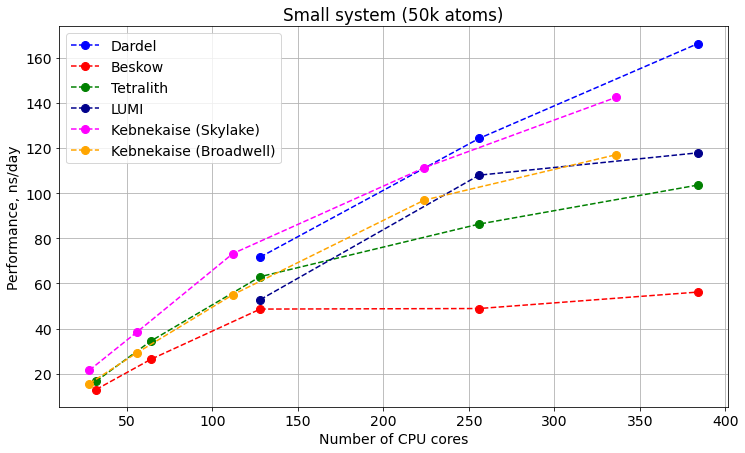

In [15]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12,7))
plt.grid()

plt.xlabel("Number of CPU cores")
plt.ylabel("Performance, ns/day")
plt.plot(dardel_small.ncpus, dardel_small.performance, color='blue', marker='o', linestyle='--', markersize=8, label='Dardel')
plt.plot(beskow_small.ncpus, beskow_small.performance, color='red', marker='o', linestyle='--', markersize=8, label='Beskow')
plt.plot(tetralith_small.ncpus, tetralith_small.performance, color='green', marker='o', linestyle='--', markersize=8, label='Tetralith')
plt.plot(lumi_small.ncpus, lumi_small.performance, color='darkblue', marker='o', linestyle='--', markersize=8, label='LUMI')
plt.plot(keb_skylake_small.ncpus[0], keb_skylake_small.performance[0], color='magenta', marker='o', linestyle='--', markersize=8, label='Kebnekaise (Skylake)')
plt.plot(keb_broadwell_small.ncpus[0], keb_broadwell_small.performance[0], color='orange', marker='o', linestyle='--', markersize=8, label='Kebnekaise (Broadwell)')
plt.legend(loc="upper left")
plt.title('Small system (50k atoms)')
plt.savefig('gmx-cpu-small.pdf')
plt.show()

In [16]:
dardel_large = PerformanceStats(HOME + '/Dardel/large-system/')
beskow_large = PerformanceStats(HOME + '/Beskow-12nodes-anatase-NP-POPE-300k/')
tetralith_large = PerformanceStats(HOME + '/Tetralith-12nodes-anatase-NP-POPE-300k/')
keb_skylake_large = PerformanceStats(HOME + '/Kebnekaise/anatase-NP-POPE-300k-Skylake/')
keb_broadwell_large = PerformanceStats(HOME + '/Kebnekaise/anatase-NP-POPE-300k-Broadwell/')
lumi_large = PerformanceStats(HOME + '/LUMI/anatase-NP-POPE-300k/')

In [17]:
keb_skylake_large.subdivideomp()

Subdividing the stats into 2 sets...


In [18]:
keb_broadwell_large.subdivideomp()

Subdividing the stats into 2 sets...


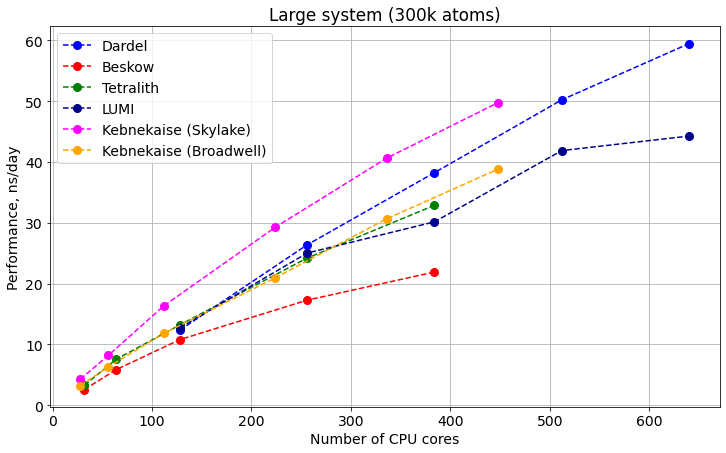

In [19]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12,7))
plt.grid()

plt.xlabel("Number of CPU cores")
plt.ylabel("Performance, ns/day")
plt.plot(dardel_large.ncpus, dardel_large.performance, color='blue', marker='o', linestyle='--', markersize=8, label='Dardel')
plt.plot(beskow_large.ncpus, beskow_large.performance, color='red', marker='o', linestyle='--', markersize=8, label='Beskow')
plt.plot(tetralith_large.ncpus, tetralith_large.performance, color='green', marker='o', linestyle='--', markersize=8, label='Tetralith')
plt.plot(lumi_large.ncpus, lumi_large.performance, color='darkblue', marker='o', linestyle='--', markersize=8, label='LUMI')
plt.plot(keb_skylake_large.ncpus[0], keb_skylake_large.performance[0], color='magenta', marker='o', linestyle='--', markersize=8, label='Kebnekaise (Skylake)')
plt.plot(keb_broadwell_large.ncpus[0], keb_broadwell_large.performance[0], color='orange', marker='o', linestyle='--', markersize=8, label='Kebnekaise (Broadwell)')
plt.legend(loc="upper left")
plt.title('Large system (300k atoms)')
plt.savefig('gmx-cpu-large.pdf')
plt.show()

# GPU benchmarks

In [20]:
keb_k80_small = PerformanceStats(HOME + '/Kebnekaise/anatase-101-POPE-50k-2xK80/', gpuruns=True)
keb_v100_small = PerformanceStats(HOME + '/Kebnekaise/anatase-101-POPE-50k-2xV100/', gpuruns=True)
berzelius_small = PerformanceStats(HOME + '/Berzelius/anatase-101-POPE-50k/', gpuruns=True)

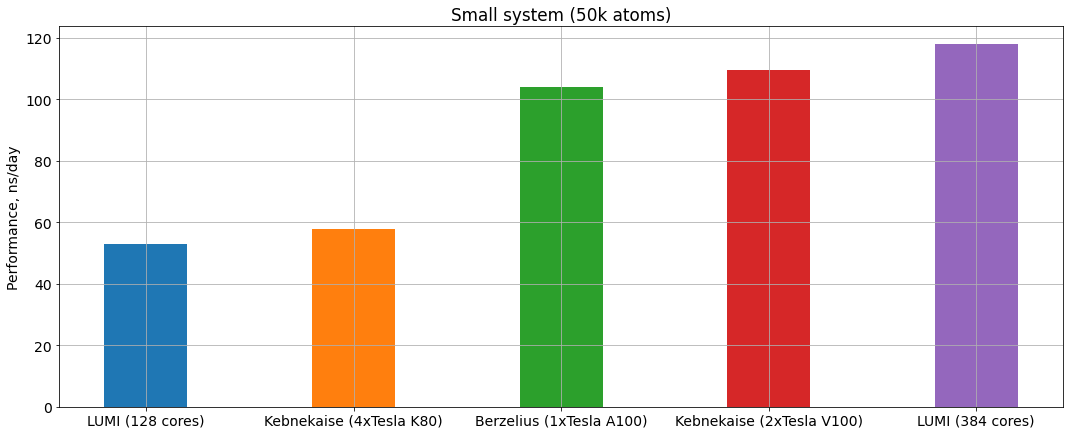

In [76]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(18,7))
plt.grid()

#plt.xlabel("Number of CPU cores")
plt.ylabel("Performance, ns/day")

nodes = ["LUMI (128 cores)", "Kebnekaise (4xTesla K80)", 
         "Berzelius (1xTesla A100)", "Kebnekaise (2xTesla V100)", "LUMI (384 cores)"]
perfs = [lumi_small.performance[0], keb_k80_small.performance[1], 
         berzelius_small.performance[0], keb_v100_small.performance[-1], lumi_small.performance[-1]]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for node, perf, color in zip(nodes, perfs, colors):
    plt.bar(node, perf, width=0.4, color=color)

plt.title('Small system (50k atoms)')
plt.savefig('gmx-gpu-small.pdf')
plt.show()

In [82]:
keb_k80_large = PerformanceStats(HOME + '/Kebnekaise/anatase-NP-POPE-300k-2xK80/', gpuruns=True)
keb_v100_large = PerformanceStats(HOME + '/Kebnekaise/anatase-NP-POPE-300k-2xV100/', gpuruns=True)
berzelius_large = PerformanceStats(HOME + '/Berzelius/anatase-NP-POPE-300k/', gpuruns=True)

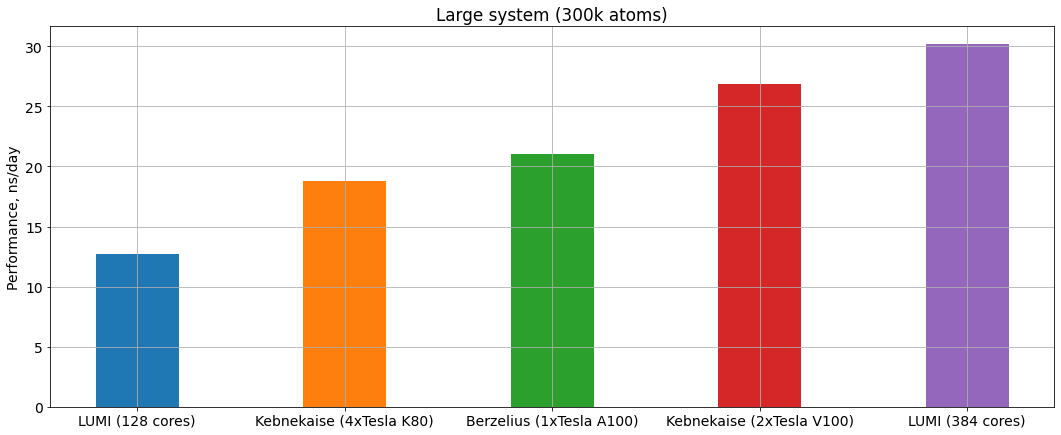

In [85]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(18,7))
plt.grid()

#plt.xlabel("Number of CPU cores")
plt.ylabel("Performance, ns/day")

nodes = ["LUMI (128 cores)", "Kebnekaise (4xTesla K80)", 
         "Berzelius (1xTesla A100)", "Kebnekaise (2xTesla V100)", "LUMI (384 cores)"]
perfs = [lumi_large.performance[0], keb_k80_large.performance[3], 
         berzelius_large.performance[0], keb_v100_large.performance[2], lumi_large.performance[2]]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for node, perf, color in zip(nodes, perfs, colors):
    plt.bar(node, perf, width=0.4, color=color)

plt.title('Large system (300k atoms)')
plt.savefig('gmx-gpu-large.pdf')
plt.show()